plot area, elevation and slope of planation surfaces in the eastern alps

In [35]:
import pandas as pd
import numpy as np
import math

# load data from csv files
# dertnig et al, 2017, kalkspitze alps
df1 = pd.read_csv('dertnig_high.csv', header=0)
df2 = pd.read_csv('dertnig_intermediate.csv', header=0)
df3 = pd.read_csv('dertnig_low.csv', header=0)

# rename columns with 10m_* to lidar*
df1.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)
df2.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)
df3.rename(columns={'10m_mean':'lidar_mean','10m_stdev':'lidar_stde','10m_min':'lidar_min','10m_max':'lidar_max'},inplace=True)

# convert area to km2 from m2
df1.area = (df1.area)/(1000000)
df2.area = (df2.area)/(1000000)
df3.area = (df3.area)/(1000000)


|column|          variable          |     handle name     |
|------|----------------------------|---------------------|
|  0   |         polygon id         |         id          |
|  1   |       area in km sq.       |        area         |
|  2   |       mean elev, srtm      |     srtm_mean       |
|  3   |    std. dev. elev, srtm    |     srtm_stdev      |
|  4   |       min. elev, srtm      |      srtm_min       |
|  5   |       max. elev, srtm      |      srtm_max       |
|  6   |    mean elev, 10m lidar    |     lidar_mean      |
|  7   | std. dev. elev, 10m lidar  |     lidar_stde      |
|  8   |    min. elev, 10m lidar    |     lidar_min       |
|  9   |    max. elev, 10m lidar    |     lidar_max       |
|  10  |    mean slope, 10m lidar   |     slope_mean      |
|  11  | std. dev. slope, 10m lidar |     slope_stde      |
|  12  |    min. slope, 10m lidar   |     slope_min       |
|  13  |    max. slope, 10m lidar   |     slope_max       |

In [36]:
df1.head(10) 
# df1 # uncomment to see full dataframe

,id,area,srtm_mean,srtm_stdev,srtm_min,srtm_max,lidar_mean,lidar_stde,lidar_min,lidar_max,slope_mean,slope_stde,slope_min,slope_max
0,1,0.871309,2277.979089,270.455823,0.0,2467.0,2313.417007,82.296582,2166.324707,2504.042969,22.029696,12.202954,0.428213,71.872307
1,2,0.175681,2135.801498,40.662053,2077.0,2266.0,2140.040496,42.365841,2076.490234,2278.033203,23.682941,11.778531,0.315881,59.167454
2,3,0.821891,1989.460683,407.061590,0.0,2333.0,2077.512541,99.176830,1867.128174,2356.693848,26.498500,12.037156,0.194537,72.767410
3,4,0.248383,2260.241470,245.998100,0.0,2487.0,2288.523391,84.211440,2184.033203,2504.429199,28.082177,11.315401,0.638377,73.401840
4,5,0.644691,1763.690381,849.704201,0.0,2470.0,2197.203558,120.404127,1991.899048,2498.456299,35.282224,13.696657,0.386992,77.728111
5,6,0.563936,1902.207135,781.961352,0.0,2361.0,2223.198550,72.905938,2006.722900,2380.201172,36.422111,14.509159,0.650331,78.509346
6,7,0.161421,2134.642276,71.981042,2037.0,2302.0,2141.514104,81.062462,2042.756836,2345.838623,34.551187,15.080671,0.634346,69.962334
7,8,1.035343,1707.515341,997.615452,0.0,2490.0,2289.244971,109.049490,2036.571777,2524.306396,38.570968,12.066723,0.456924,74.214958
8,9,0.421770,2156.589587,604.056918,0.0,2497.0,2332.729571,70.583675,2180.495361,2522.171875,38.471728,11.450711,1.160249,71.810242
9,10,0.345560,2243.804143,45.462711,2165.0,2369.0,2246.550173,48.058105,2151.812012,2387.518066,31.486673,13.703225,0.064789,72.711533


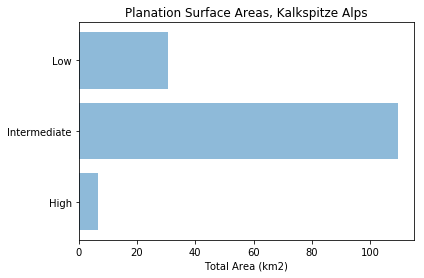

In [37]:
# plot bar chart of total area of each planation surface
%matplotlib inline 
from matplotlib import pyplot as plt

total_area = [np.sum(df1.area),np.sum(df2.area),np.sum(df3.area)]
surf_id = ('High', 'Intermediate', 'Low')
y_pos = np.arange(len(surf_id))

#plan_bar = plt.figure(figsize = (10,6))
plt.barh(y_pos, total_area, align='center', alpha=0.5)
plt.yticks(y_pos, surf_id)
plt.xlabel('Total Area (km2)')
plt.title('Planation Surface Areas, Kalkspitze Alps')
plt.show()

Text(0.5, 1.0, '10m LiDAR')

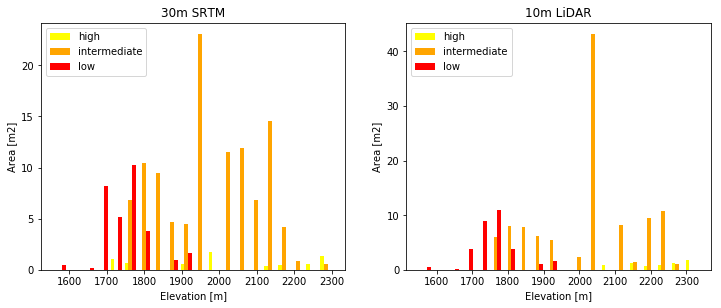

In [38]:
# plot histograms of planation surface elevation and slope in bins with area as frequency
# elevation
num_bins = 20

# compare srtm and lidar datasets
plt.figure(figsize=[12,10])
ax1 = plt.subplot(221)
n, bins, patches = ax1.hist([df1.srtm_mean,df2.srtm_mean,df3.srtm_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper left')
plt.title('30m SRTM')


ax2 = plt.subplot(222)
n, bins, patches = ax2.hist([df1.lidar_mean,df2.lidar_mean,df3.lidar_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper left')
plt.title('10m LiDAR')

Text(0.5, 1.0, 'Slope')

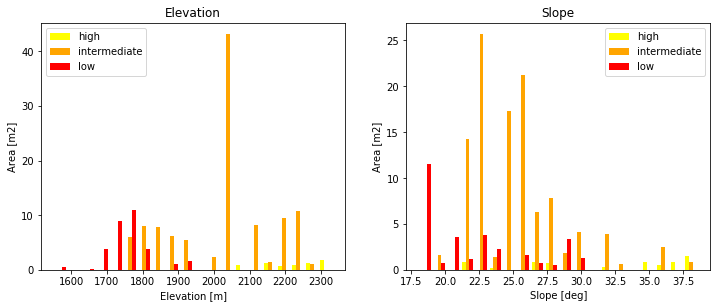

In [39]:
# plot elevations and slopes
plt.figure(figsize=[12,10])
ax1 = plt.subplot(221)
n, bins, patches = ax1.hist([df1.lidar_mean,df2.lidar_mean,df3.lidar_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper left')
plt.title('Elevation')

ax2 = plt.subplot(222)
n, bins, patches = ax2.hist([df1.slope_mean,df2.slope_mean,df3.slope_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Slope [deg]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper right')
plt.title('Slope')

Text(0.5, 1.0, 'Slope')

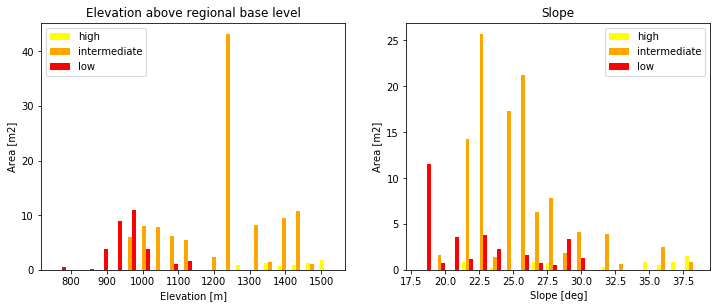

In [44]:
# define dertnig base level to be around 800m asl
base_dertnig = 800

# subtract base level from elevation values to get height above base level and plot
df1["elev_baselvl"] = df1.lidar_mean-base_dertnig
df2["elev_baselvl"] = df2.lidar_mean-base_dertnig
df3["elev_baselvl"] = df3.lidar_mean-base_dertnig

# plot data
plt.figure(figsize=[12,10])
ax1 = plt.subplot(221)
n, bins, patches = ax1.hist([df1.elev_baselvl,df2.elev_baselvl,df3.elev_baselvl], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Elevation [m]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper left')
plt.title('Elevation above regional base level')

ax2 = plt.subplot(222)
n, bins, patches = ax2.hist([df1.slope_mean,df2.slope_mean,df3.slope_mean], bins=num_bins, weights=[df1.area,df2.area, df3.area],color=['yellow', 'orange', 'red'], label=['high', 'intermediate', 'low'])
plt.xlabel('Slope [deg]')
plt.ylabel('Area [m2]')
plt.legend(loc='upper right')
plt.title('Slope')